2.8.1 리퀘스트로 인터넷에서 파일 가져오기

In [2]:
import requests

url = 'http://bit.ly/2JnsHnT'
r = requests.get(url, stream=True).raw

In [3]:
from PIL import Image

img = Image.open(r)
img.show()
img.save('src.png')

In [4]:
print(img.get_format_mimetype)

<bound method ImageFile.get_format_mimetype of <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2918x3024 at 0x2006796D850>>


In [6]:
BUF_SIZE = 1024
with open('src.png', 'rb') as sf, open('dst.png', 'wb') as df:
    while True:
        data =sf.read(BUF_SIZE)
        if not data:
            break
        df.write(data)

In [11]:
import hashlib

sha_src = hashlib.sha256()
sha_dst = hashlib.sha256()

with open('src.png', 'rb') as sf, open('dst.png', 'rb') as df:
    sha_src.update(sf.read())
    sha_dst.update(df.read())
    
print('src.pngs hash : {}'.format(sha_src.hexdigest()))
print('dst.pngs hash : {}'.format(sha_dst.hexdigest()))      

src.pngs hash : c297b8f0d3fd8a4c38bc826607d744778e11815ba3e22ffde1dc69d8dfe5800a
dst.pngs hash : c297b8f0d3fd8a4c38bc826607d744778e11815ba3e22ffde1dc69d8dfe5800a


In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

dst_img = mpimg.imread('dst.png')

In [14]:
print(dst_img)

[[[0.5686275  0.58431375 0.5803922 ]
  [0.5647059  0.5803922  0.5764706 ]
  [0.5803922  0.59607846 0.5921569 ]
  ...
  [0.80784315 0.83137256 0.83137256]
  [0.8039216  0.827451   0.827451  ]
  [0.8        0.8235294  0.8235294 ]]

 [[0.57254905 0.5882353  0.58431375]
  [0.5764706  0.5921569  0.5882353 ]
  [0.5647059  0.5803922  0.5764706 ]
  ...
  [0.8        0.8235294  0.8235294 ]
  [0.79607844 0.81960785 0.81960785]
  [0.79607844 0.81960785 0.81960785]]

 [[0.5568628  0.57254905 0.5686275 ]
  [0.5764706  0.5921569  0.5882353 ]
  [0.5686275  0.58431375 0.5803922 ]
  ...
  [0.8        0.8235294  0.8235294 ]
  [0.79607844 0.81960785 0.81960785]
  [0.79607844 0.81960785 0.81960785]]

 ...

 [[0.7137255  0.7294118  0.7411765 ]
  [0.7058824  0.72156864 0.73333335]
  [0.70980394 0.7254902  0.7372549 ]
  ...
  [0.83137256 0.8352941  0.8509804 ]
  [0.83137256 0.8352941  0.8509804 ]
  [0.83137256 0.8352941  0.8509804 ]]

 [[0.7058824  0.72156864 0.73333335]
  [0.69803923 0.7137255  0.7254902 ]


In [15]:
pseudo_img = dst_img [:, :, 0]
print(pseudo_img)

[[0.5686275  0.5647059  0.5803922  ... 0.80784315 0.8039216  0.8       ]
 [0.57254905 0.5764706  0.5647059  ... 0.8        0.79607844 0.79607844]
 [0.5568628  0.5764706  0.5686275  ... 0.8        0.79607844 0.79607844]
 ...
 [0.7137255  0.7058824  0.70980394 ... 0.83137256 0.83137256 0.83137256]
 [0.7058824  0.69803923 0.7019608  ... 0.83137256 0.8352941  0.8352941 ]
 [0.7058824  0.7019608  0.7137255  ... 0.83137256 0.83137256 0.8352941 ]]


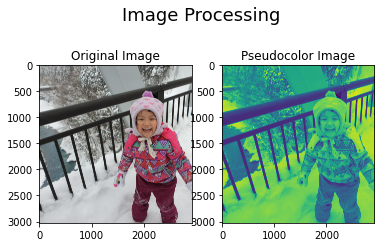

In [16]:
plt.suptitle('Image Processing', fontsize=18)
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(mpimg.imread('src.png'))

plt.subplot(122)
plt.title('Pseudocolor Image')
dst_img = mpimg.imread('dst.png')
pseudo_img = dst_img [:, :, 0]
plt.imshow(pseudo_img)
plt.show()